<a href="https://colab.research.google.com/github/nsydn/probstat/blob/master/linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression

### The Boston Housing Dataset
The Boston Housing Dataset includes data concerning housing in the towns of Boston, MA. The following describes the dataset columns:

* CRIM: per capita crime rate by town
* RM: average number of rooms per unit
* AGE: proportion of units built before 1940
* DIS: weighted distances to five Boston employment centres
* PTRATIO: pupil-teacher ratio by town
* LSTAT: proportion (\%) of low-educated population
* MEDV: median value of houses (in \$1000 units)

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded = files.upload()
import matplotlib.pyplot as plt

Saving housing_clean.csv to housing_clean.csv


In [ ]:
from pandas import read_csv
column_names = ['CRIM', 'RM', 'AGE', 'DIS', 'PTRATIO', 'LSTAT', 'MEDV']
data = read_csv('housing_clean.csv', header=None, names=column_names)
print(data.head(5))

      CRIM     RM   AGE     DIS  PTRATIO  LSTAT  MEDV
0  0.00632  6.575  65.2  4.0900     15.3   4.98  24.0
1  0.02731  6.421  78.9  4.9671     17.8   9.14  21.6
2  0.02729  7.185  61.1  4.9671     17.8   4.03  34.7
3  0.03237  6.998  45.8  6.0622     18.7   2.94  33.4
4  0.06905  7.147  54.2  6.0622     18.7   5.33  36.2


In [ ]:
print(np.shape(data))
print(data.describe())

(436, 7)
             CRIM          RM         AGE  ...     PTRATIO       LSTAT        MEDV
count  436.000000  436.000000  436.000000  ...  436.000000  436.000000  436.000000
mean     1.373758    6.301686   65.114679  ...   18.311927   11.701950   22.787156
std      2.460645    0.610307   28.100681  ...    2.147855    6.098762    7.360121
min      0.006320    3.561000    2.900000  ...   12.600000    1.980000    6.300000
25%      0.069875    5.923000   40.475000  ...   16.900000    6.840000   18.400000
50%      0.180290    6.211000   70.950000  ...   18.600000   10.450000   21.700000
75%      1.072092    6.604500   91.325000  ...   20.200000   15.430000   25.000000
max      9.966540    8.780000  100.000000  ...   22.000000   34.410000   48.800000

[8 rows x 7 columns]


Text(0, 0.5, 'MEDV')

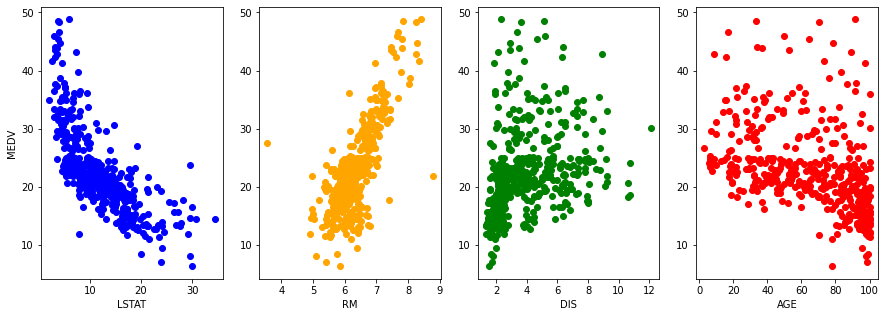

In [ ]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].scatter(data.LSTAT, data.MEDV, color='blue'); axs[0].set_xlabel('LSTAT'); axs[0].set_ylabel('MEDV')
axs[1].scatter(data.RM, data.MEDV, color='orange'); axs[1].set_xlabel('RM'); axs[0].set_ylabel('MEDV')
axs[2].scatter(data.DIS, data.MEDV, color='green'); axs[2].set_xlabel('DIS'); axs[0].set_ylabel('MEDV')
axs[3].scatter(data.AGE, data.MEDV, color='red'); axs[3].set_xlabel('AGE'); axs[0].set_ylabel('MEDV')

### Hypothesis
We'd like to propose the following hypothesis:

*   $H_0$: $\beta_1=\beta_2=\dots=\beta_k=0$ (There is no significant relation between $X$ variables and $Y$.)
*   $H_1$: $\beta_j\neq 0$ at least for one $j\in\{1,\dots,k\}$ (There is significant relation between at least one $X$ variable and $Y$.)

### Simple Linear Regression

Simple linear regression is an approach for predicting a quantitative **response** using a **one or more features** (or "regressors" or "predictors" or "input variables" or "independent variables"). It takes the following form:

$y = \beta_0 + \beta_1x_1 + \dots + \beta_nx_n + \epsilon$

What does each term represent?
- $y$ is the response
- $x_1,\dots,x_n$ are features
- $\beta_0$ is the **population** intercept coefficient
- $\beta_1,\dots,\beta_n$ are the *population* slope coefficients for $x_1,\dots,x_n$
- $\epsilon$ is the **population** error/residual/innovation term

To be able use our model, we must **estimate** the values of these coefficients based on available data (**model training**). And once we've estimated these coefficients, we can use the model to **predict** $y$ values for items that are not in our sample (**model test**).

### Estimating (or *Learning*) Model Coefficients

Now, assume we have a data set of $N$ observations. Model coefficients are generally estimated using the ordinary **Least Squares Method**, which means we are estimating the regression line that minimizes the **sum of squared errors** and therefore maximizes the $R^2$: $$SSE=\sum_{i=1}^N (y_i-\hat{y})^2=\sum_{i=1}^N e_i^2\quad R^2=1-\frac{SSE}{TSS}$$

**`linregress`**: Python `scipy`'s `linregress` function can only be used for **single-variable** regressions. Alternatively, we can use `statsmodels` to estimate the model coefficients for the house price data:

In [ ]:
x=data.RM; y=data.MEDV
from scipy import stats
b1,b0,rho,p,se = stats.linregress(x,y)
print(' Intercept (b0): %.4f\n Slope (b1): %.4f\n P-value: %.4f\n R-squared: %.4f' % (b0,b1,p,rho**2))

 Intercept (b0): -34.1593
 Slope (b1): 9.0367
 P-value: 0.0000
 R-squared: 0.5615


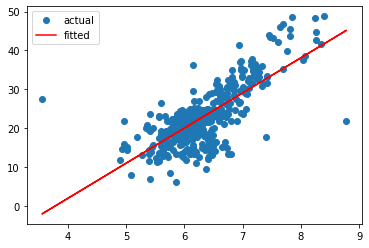

In [ ]:
plt.plot(x, y, 'o', label='actual')
plt.plot(x, b0 + b1*x, 'r', label='fitted')
plt.legend()

**`statsmodels`**: Getting a detailed regression report is not easy in `stats.linregress`. Instead, we can use `statsmodels` which also allows for **multi-variable** regressions.

In [ ]:
import statsmodels.formula.api as smf

# Define and fit a regression model
model = smf.ols(formula='MEDV ~ RM', data=data)
linreg = model.fit()

# Print the model coefficients or a summary table
print(linreg.params)
print(linreg.summary())

Intercept   -34.159291
RM            9.036700
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     555.7
Date:                Tue, 11 May 2021   Prob (F-statistic):           1.04e-79
Time:                        05:50:47   Log-Likelihood:                -1308.7
No. Observations:                 436   AIC:                             2621.
Df Residuals:                     434   BIC:                             2630.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [ ]:
import statsmodels.formula.api as smf

# Fit a regression model
model = smf.ols(formula='MEDV ~ LSTAT + RM + AGE + DIS', data=data)
linreg = model.fit()

# Print the model coefficients or a summary table
print(linreg.params)
print(linreg.summary())

Intercept   -5.927427
LSTAT       -0.437618
RM           6.184593
AGE         -0.049344
DIS         -0.469791
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     243.6
Date:                Tue, 11 May 2021   Prob (F-statistic):          3.64e-109
Time:                        05:52:53   Log-Likelihood:                -1230.8
No. Observations:                 436   AIC:                             2472.
Df Residuals:                     431   BIC:                             2492.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------

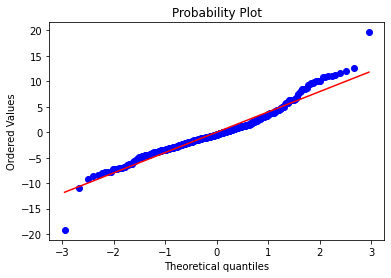

In [ ]:
import scipy.stats as stats
#plt.scatter(reg_line.resid,)
qq = stats.probplot(reg_line.resid,dist=stats.norm,plot=plt)

### Interpreting Model Coefficients

How do we interpret the `LSTAT`, `RM` and `AGE` coefficients ($b_1$, $b_2$, $b_3$ and $b_4$) estimated from our example?
- A unit increase in the proportion of low-status population is **associated with** a `0.5439` unit (in \$1000) decrease in median value of houses (when other variables `RM` and `AGE` are kept constant).
- A unit increase in the average number of rooms per house is **associated with** a `5.8246` unit (in \$1000) increase in median value of houses (when other variables `LSTAT` and `AGE` are kept constant).
- Similar interpretations for $b_3$ and $b_4$.


It is good to recall few points:

- $B_0$ and $B_1$ are estimators of population parameters $\beta_0$ and $\beta_1$
- This means $B_0$ and $B_1$ have their own sampling distributions (It is Student's $t$ distribution.).
- Coefficients $b_0$ and $b_1$ are realizations of $B_0$ and $B_1$ estimated from a certain sample
- We can indeed use $b_0$ and $b_1$ to make inferences about $\beta_0$ and $\beta_1$ (e.g., build confidence intervals, carry out hypothesis tests, etc.)
- But for this class, we will not *manually* calculate $t$ values or derive confidence intervals for $\beta_0$ and $\beta_1$. We'll only interpret outputs from `scipy`, `statsmodels` or `sklearn`.

By default `statsmodels` calculates two-sided 95% confidence intervals for our model coefficients, but we can change it to any $\alpha$ value we want. We can create 90% confidence intervals (which would be be more narrower) or 99% confidence intervals (which would be wider), or whatever intervals we like.

### Using the Model for Prediction

Let's assume that the median value for a new town with $\{x_1,x_2,x_3,x_4\}=\{20,7,6,50\}$ What would be your point prediction for his/her blood pressure?

$$\hat{y} = b_0 + b_1x_1 + b_2x_2$$

$$\hat{y} = -5.9274 - 0.4376(20) + 6.1846(7) - 0.0493(6) - 0.4698(50)$$

In [ ]:
print('y_hat = %.4f + (%.4f)b1 + (%.4f)b2 + (%.4f)b3 + (%.4f)b4' % (reg_line.params.Intercept, reg_line.params.LSTAT, reg_line.params.RM, reg_line.params.AGE, reg_line.params.DIS))

y_hat = -5.9274 + (-0.4376)b1 + (6.1846)b2 + (-0.0493)b3 + (-0.4698)b4
